In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#importing the data
mnist = pd.read_csv('./MNIST/train_final.csv')
mnist_test = pd.read_csv('./MNIST/test_final.csv')

In [3]:
#Shuffling the dataset
mnist = shuffle(mnist)
mnist_test = shuffle(mnist_test)

In [5]:
#Splitting into train and test
X_train = mnist.ix[:,1:]
X_test = mnist.ix[:,1:]
y_train = mnist.ix[:,0]
y_test = mnist.ix[:,0]

6


C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


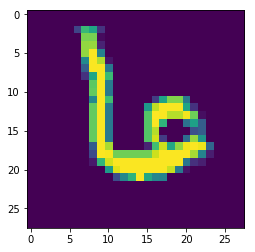

In [32]:
dig = X_train.ix[25000,:]
dig1 = dig.reshape(28,28)
plt.imshow(dig1)
print(y_train[25000])

In [6]:
#scaling the input 
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train.astype(np.float64))

Fine tune hyperparameter using gridsearchCV for K nearest neighbors

In [7]:
grid_p = [{'weights' : ['uniform', 'distance'], 'n_neighbors' : [5,10]}]
nclassifier  = KNeighborsClassifier()
grid_search = GridSearchCV(nclassifier, grid_p, cv=5, verbose=3)
grid_search.fit(X_train_sc,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] weights=uniform, n_neighbors=5 ..................................
[CV] ... weights=uniform, n_neighbors=5, score=0.934008, total= 5.6min
[CV] weights=uniform, n_neighbors=5 ..................................
[CV] ... weights=uniform, n_neighbors=5, score=0.933038, total= 5.3min
[CV] weights=uniform, n_neighbors=5 ..................................
[CV] ... weights=uniform, n_neighbors=5, score=0.937179, total= 5.9min
[CV] weights=uniform, n_neighbors=5 ..................................
[CV] ... weights=uniform, n_neighbors=5, score=0.934656, total= 5.0min
[CV] weights=uniform, n_neighbors=5 ..................................
[CV] ... weights=uniform, n_neighbors=5, score=0.936442, total= 5.1min
[CV] weights=distance, n_neighbors=5 .................................
[CV] .. weights=distance, n_neighbors=5, score=0.935256, total= 5.0min
[CV] weights=distance, n_neighbors=5 .................................
[CV] .. weights=d

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 51.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 527.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [5, 10], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [8]:
#identifying the best parameters
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [9]:
grid_search.best_score_

0.93742198552051259

In [11]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.82250145627028382